In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

In [20]:
files = glob.glob('../FLIPFLOP/GA/*.csv')
files.sort()
files
#Number of Trials
trials = 2
#File name beginining
nb = 25
#File name ending
ne = -10

In [21]:
dfs = []
for indx, f in enumerate(files):
    dfs.append(pd.read_csv(f))

In [22]:
df_concats = []
for x in range(0,len(dfs),trials):
    df_concat = pd.concat((dfs[x],dfs[x+1]))
    by_row_index = df_concat.groupby(df_concat.index)
    df_means = by_row_index.mean()
    df_concats.append(df_means.loc[[5,10,50,100,150,200]])

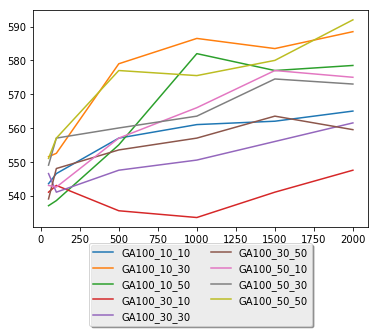

In [23]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['fitness']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

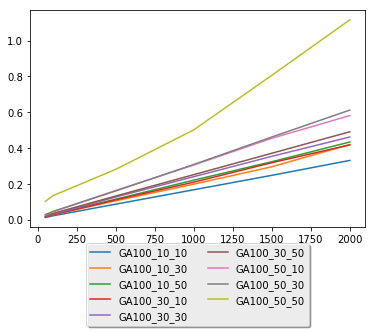

In [24]:
ax = plt.subplot(111)
for i,row in enumerate(df_concats):
    ax.plot(row[['iterations']],row[['time']], label = files[i*trials][nb:ne])
    
ax.legend()    
chartBox = ax.get_position()
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),  shadow=True, ncol=2)
plt.show()

In [25]:
for i in range(len(df_concats)):
    print(i, files[i*trials][nb:ne])

0 GA100_10_10
1 GA100_10_30
2 GA100_10_50
3 GA100_30_10
4 GA100_30_30
5 GA100_30_50
6 GA100_50_10
7 GA100_50_30
8 GA100_50_50


In [26]:
#Change this
df = df_concats[1]
df

,iterations,fitness,time,fevals
5,50.0,551.5,0.015775,2112.0
10,100.0,552.5,0.027199,3767.0
50,500.0,579.0,0.105057,17146.5
100,1000.0,586.5,0.198115,33837.5
150,1500.0,583.5,0.295282,50472.5
200,2000.0,588.5,0.419627,67217.5


In [27]:
with open('../FLIPFLOP/ff_results.csv', 'a') as f:
    f.write('#Genetic Algorithm\n')
    
df.to_csv('../FLIPFLOP/ff_results.csv', sep=',', mode='a', header=True)